In [74]:
import cv2
import torch
from torchvision import transforms
from PIL import Image, ImageDraw
import numpy as np
from torch_snippets import *
from torchvision.datasets import MNIST  
device = 'cuda:0'

In [75]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True), 
            nn.Linear(128,64), 
            nn.ReLU(True), 
            nn.Linear(64, latent_dim))
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64), 
            nn.ReLU(True), 
            nn.Linear(64,128), 
            nn.ReLU(True), 
            nn.Linear(128, 28*28), 
            nn.Tanh())
    
    def forward(self, x):
        x = x.view(len(x), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(len(x), 1, 28, 28)
        return x 

In [76]:

model = torch.load('../public/models/model.pt', map_location=device)
checkpoint = torch.load('../public/weights/weights.pt', map_location=device)
model.load_state_dict(checkpoint)
model.to(device)
model.eval()

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=128, out_features=784, bias=True)
    (5): Tanh()
  )
)

In [77]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize([0.5], [0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

In [78]:
trn_ds = MNIST('../public/content/', transform=transform, train=True, download=True)
val_ds = MNIST('../public/content/', transform=transform, train=False, download=True)

batch_size = 256 
trn_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9B945DF0>


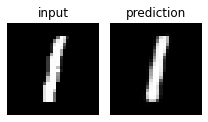

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CFCA8B0>


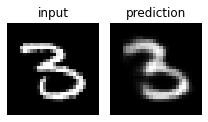

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98102D90>


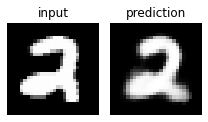

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC983438B0>


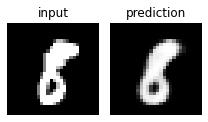

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98719100>


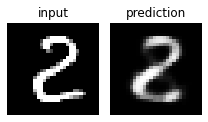

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC92725040>


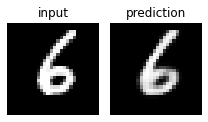

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC985516A0>


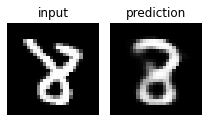

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9856E1F0>


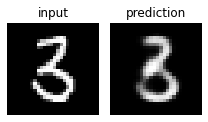

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98446880>


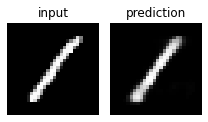

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC927F9040>


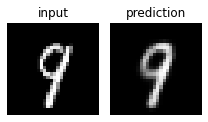

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98805760>


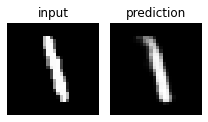

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC980C6670>


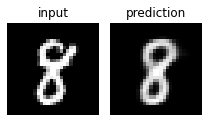

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9D10E7F0>


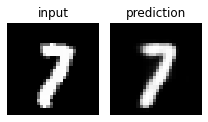

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9820B5E0>


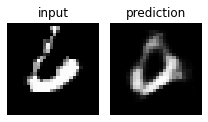

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC981CD0A0>


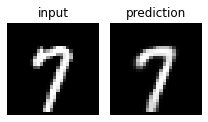

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC985C00D0>


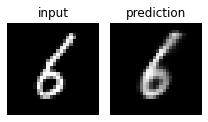

<PIL.Image.Image image mode=F size=28x28 at 0x7FCCA825B070>


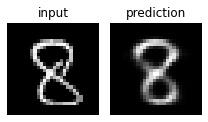

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9B9E32E0>


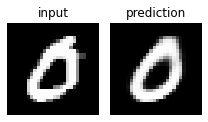

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9BCEE550>


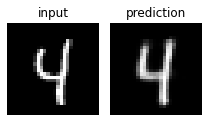

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9824E9D0>


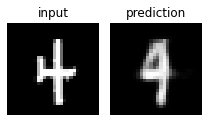

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9848F880>


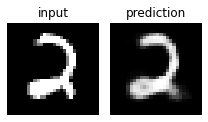

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CD65C10>


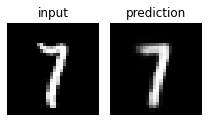

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC981CD100>


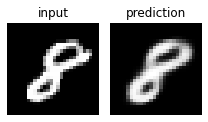

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC980EE850>


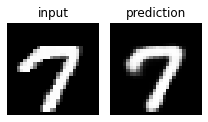

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98722070>


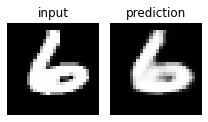

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC927A90D0>


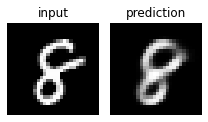

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC984F8100>


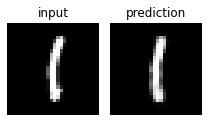

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC927F7DC0>


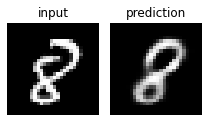

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CFACF40>


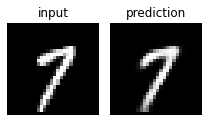

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC928DBE50>


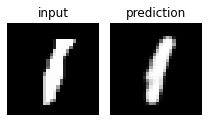

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC928DBEE0>


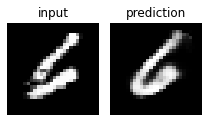

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CF14220>


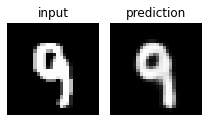

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC980AFD60>


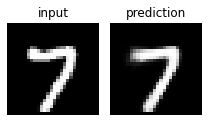

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98094EB0>


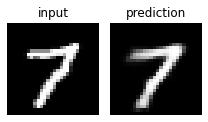

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC983CF340>


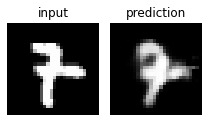

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC982BAC10>


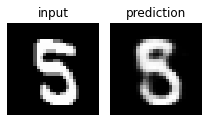

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC984E2C10>


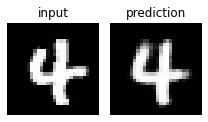

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CDD7040>


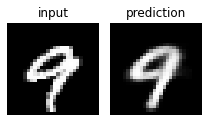

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CF88880>


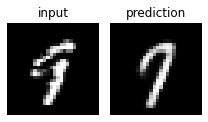

<PIL.Image.Image image mode=F size=28x28 at 0x7FCCA82601F0>


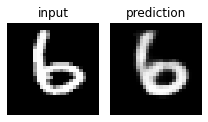

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9BCF2A30>


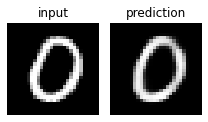

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC928D4F70>


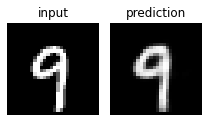

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC983D97F0>


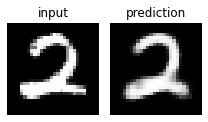

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC982F9DF0>


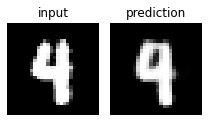

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98080F10>


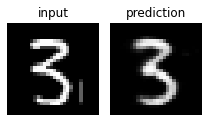

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9857DF10>


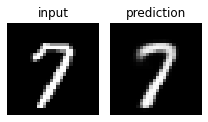

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC986DF7C0>


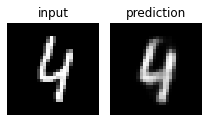

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98249550>


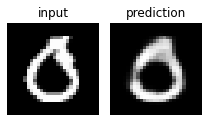

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC927F15E0>


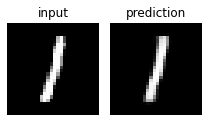

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98474E50>


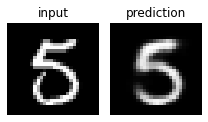

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98474EE0>


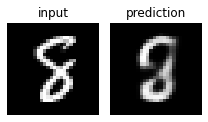

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CE78CD0>


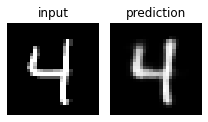

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC92803D60>


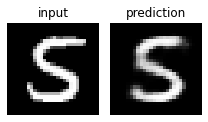

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC927A8820>


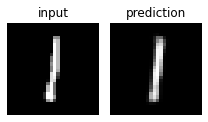

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC926FF0D0>


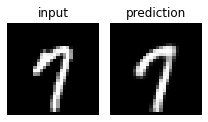

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9855AC10>


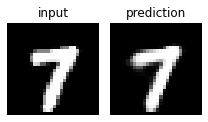

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC987D1340>


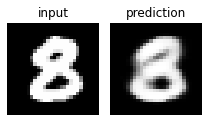

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CF6EDC0>


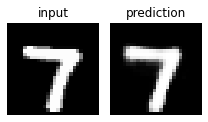

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9BD98940>


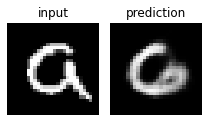

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9824AF40>


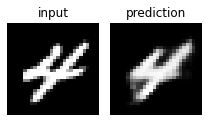

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CD79340>


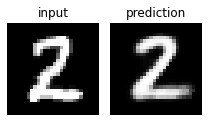

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC986C6100>


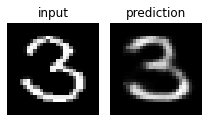

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9889D9D0>


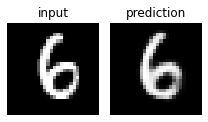

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC987B1BE0>


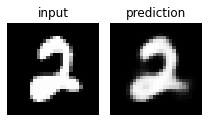

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC928C3DC0>


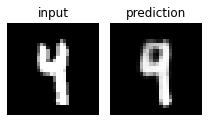

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98563D00>


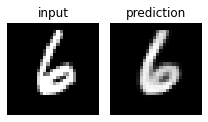

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC983230A0>


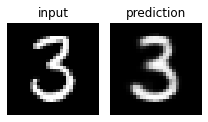

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC984A3A60>


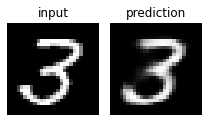

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9BA2F910>


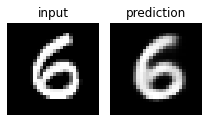

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98110E50>


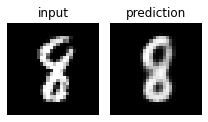

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC980BE640>


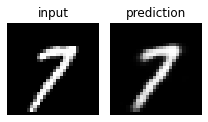

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CF81460>


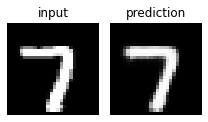

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9B8E94C0>


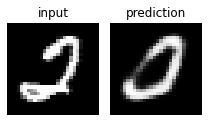

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC981FC640>


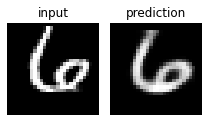

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC981DE5E0>


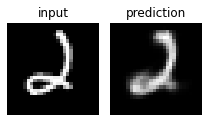

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC983A7070>


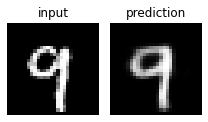

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CF14F70>


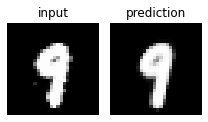

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9814B0D0>


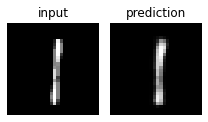

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9830EA60>


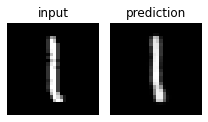

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CE9B3A0>


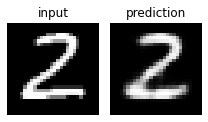

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CCEF9A0>


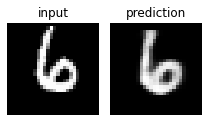

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9B86FCD0>


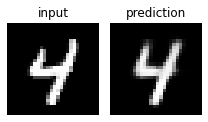

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9BBAE8E0>


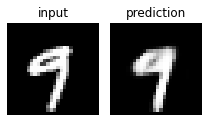

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98034790>


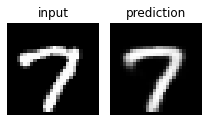

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9285FE20>


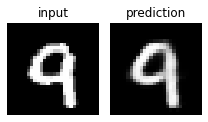

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9840F0A0>


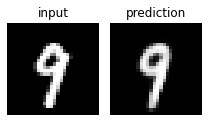

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC987C6CA0>


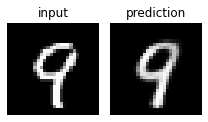

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98359730>


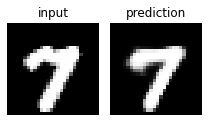

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC928D1CD0>


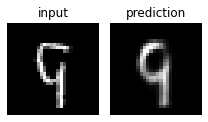

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98549280>


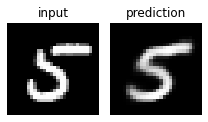

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98253370>


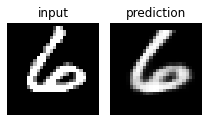

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9B8E9430>


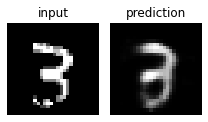

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9CD79B20>


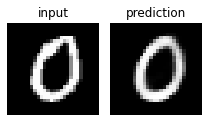

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC927B3D00>


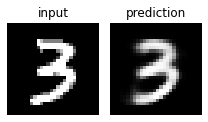

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC98716F40>


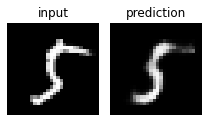

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC926F6640>


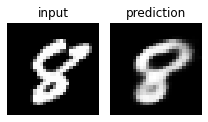

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC982FE6A0>


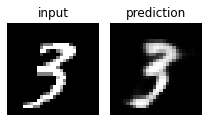

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9D0ED100>


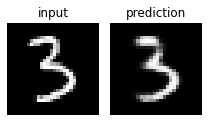

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC986D0BE0>


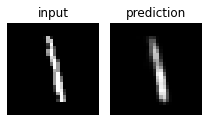

<PIL.Image.Image image mode=F size=28x28 at 0x7FCC9B945DF0>


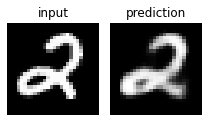

In [82]:
for i in range(100):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    img = Image.fromarray(im.cpu().detach().numpy()[0])
    img.save("faces.png")
    _im = model(im[None])[0]
    fig, ax = plt.subplots(1, 2, figsize=(3,3))
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')

    plt.tight_layout()
    plt.show()